<a href="https://colab.research.google.com/github/hanwo-ol/python_202601_lecture/blob/main/Day09_15_seaborn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn을 활용한 Diamonds 데이터셋 심화 EDA

`diamonds` 데이터셋은 53,940개의 관측치와 10개의 변수로 구성되어 있습니다. 수치형 변수와 범주형 변수가 적절히 혼합되어 있어 실무 수준의 탐색적 데이터 분석(EDA)을 학습하기에 적합합니다.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
diamonds = sns.load_dataset('diamonds')

# 데이터 기본 정보 확인
(diamonds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 1. 범주형 - 범주형 변수 분석 (Categorical - Categorical)
두 범주형 변수 간의 결합 빈도를 분석하여 특정 속성 간의 상관관계를 파악합니다.

### 1.1 교차표(Cross-tabulation)와 히트맵
`cut`(세공 상태)과 `color`(색상 등급)의 관계를 빈도수로 시각화합니다.


In [4]:
# 교차표 생성
ct = pd.crosstab(diamonds['cut'], diamonds['color'])

In [5]:
ct

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


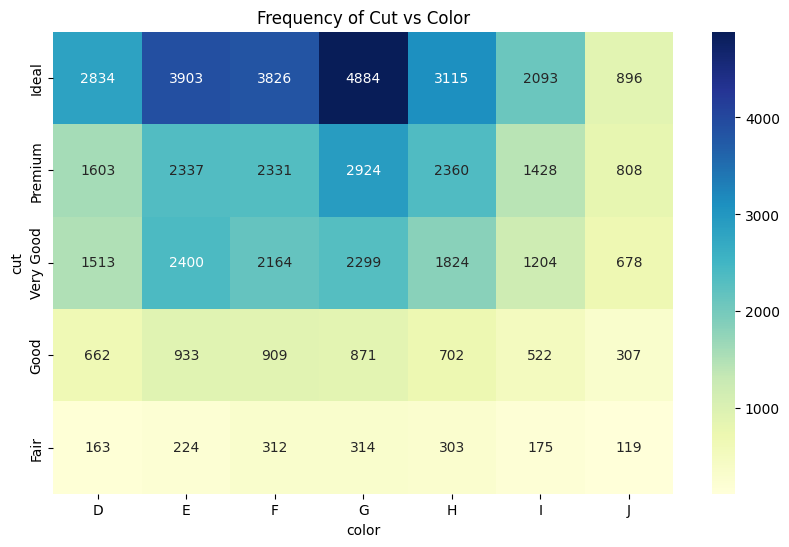

In [6]:
# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frequency of Cut vs Color')
plt.show()


### 1.2 누적 막대 그래프 (Stacked Bar Chart)
`clarity`(투명도) 등급 내에서 `cut`의 비율을 분석합니다.


In [8]:
# 비율 계산을 위한 정규화된 교차표
ct_norm = pd.crosstab(diamonds['clarity'], diamonds['cut'], normalize='index')
ct_norm

cut,Ideal,Premium,Very Good,Good,Fair
clarity,,,,,
IF,0.677095,0.128492,0.149721,0.039665,0.005028
VVS1,0.560055,0.168536,0.215869,0.050889,0.004651
VVS2,0.514410,0.171733,0.243782,0.056455,0.013620
VS1,0.439236,0.243422,0.217232,0.079305,0.020805
VS2,0.413689,0.273862,0.211372,0.079785,0.021292
SI1,0.327746,0.273632,0.247991,0.119403,0.031228
SI2,0.282576,0.320753,0.228410,0.117577,0.050685
I1,0.197031,0.276653,0.113360,0.129555,0.283401


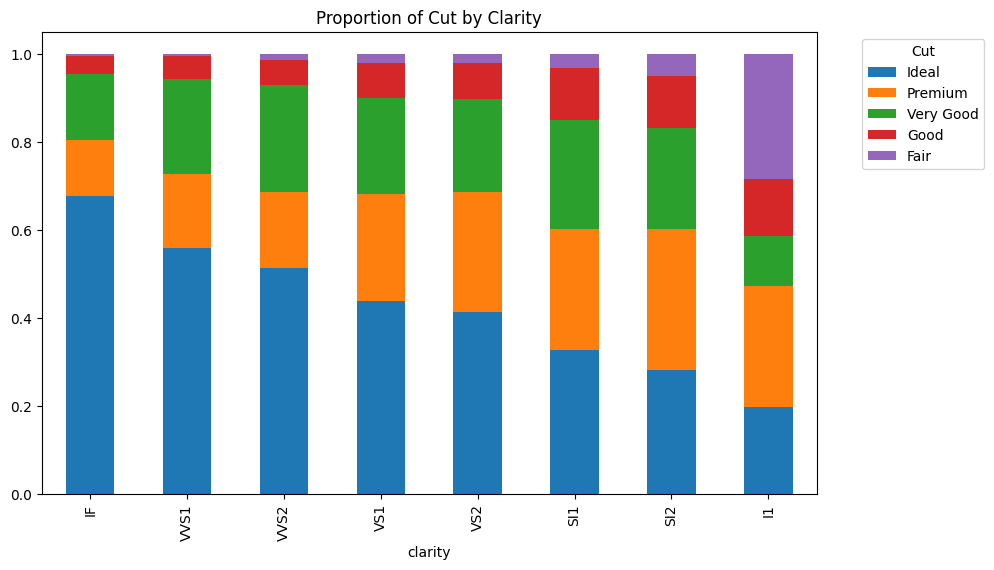

In [9]:
# 시각화
ct_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Cut by Clarity')
plt.legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 2. 수치형 - 범주형 변수 분석 (Numeric - Categorical)
범주에 따른 수치 데이터의 분포와 통계적 차이를 분석합니다.

### 2.1 박스 플롯(Box Plot)과 바이올린 플롯(Violin Plot)
`cut` 등급에 따른 `price`(가격)의 분포와 이상치를 확인합니다.


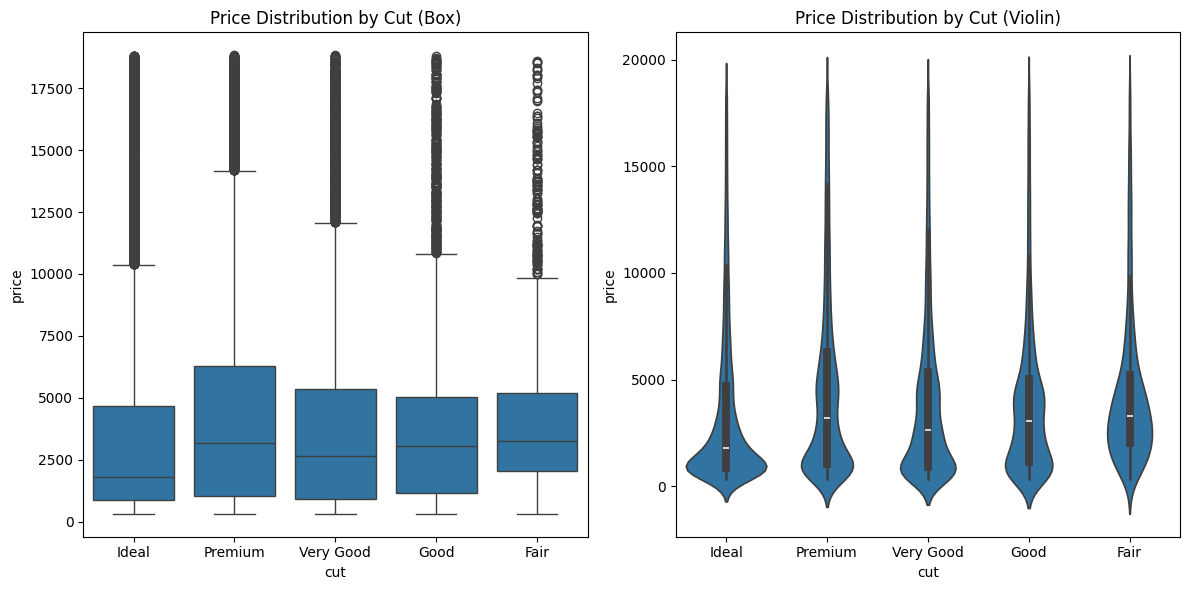

In [10]:
plt.figure(figsize=(12, 6))

# Box Plot: 사분위수 및 이상치 확인
plt.subplot(1, 2, 1)
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Price Distribution by Cut (Box)')

# Violin Plot: 데이터의 밀도 분포 확인
plt.subplot(1, 2, 2)
sns.violinplot(data=diamonds, x='cut', y='price')
plt.title('Price Distribution by Cut (Violin)')

plt.tight_layout()
plt.show()

### 2.2 막대 그래프(Bar Plot)와 신뢰구간
범주별 평균값과 오차 범위를 시각화합니다.


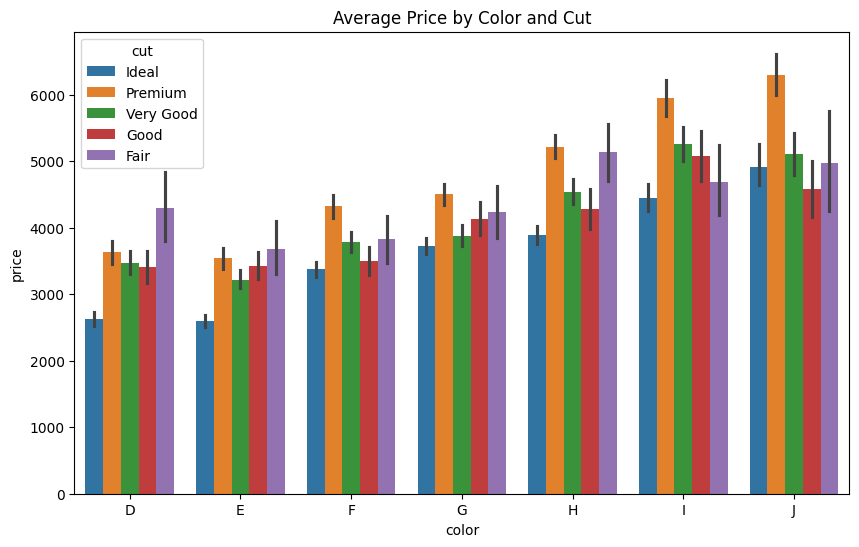

In [11]:
plt.figure(figsize=(10, 6))
# ci='sd'는 표준편차를 표시, 기본값은 95% 신뢰구간
sns.barplot(data=diamonds, x='color', y='price', hue='cut', estimator='mean')
plt.title('Average Price by Color and Cut')
plt.show()


## 3. 수치형 - 수치형 변수 분석 (Numeric - Numeric)
변수 간의 선형/비선형 관계 및 상관성을 분석합니다.

### 3.1 산점도(Scatter Plot)와 회귀선
`carat`(무게)과 `price`(가격)의 관계를 분석합니다. 데이터 양이 많으므로 `sample`을 추출하여 시각화 효율을 높입니다.

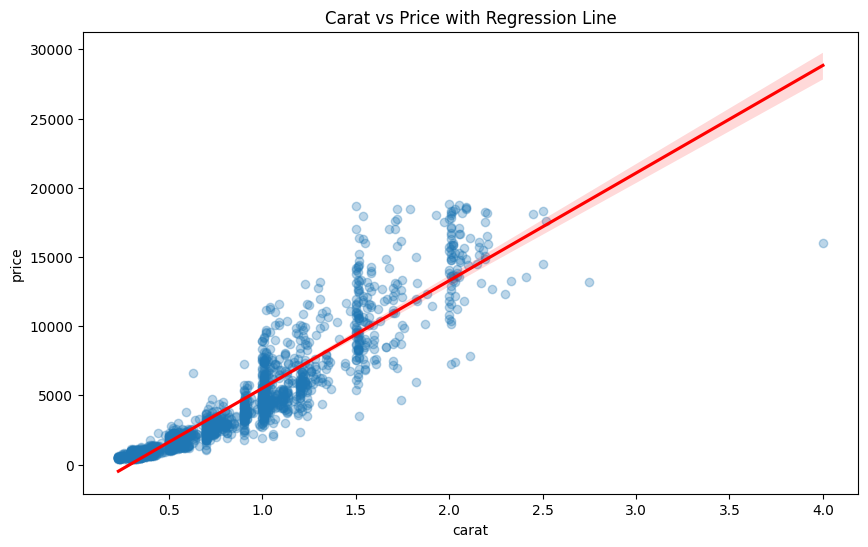

In [13]:
# 2000개 샘플 추출
df_sample = diamonds.sample(2000, random_state=42)

plt.figure(figsize=(10, 6))
sns.regplot(data=df_sample, x='carat', y='price',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Carat vs Price with Regression Line')
plt.show()

### 3.2 조인트 플롯(Joint Plot)
두 변수의 관계와 개별 변수의 분포를 동시에 확인합니다.

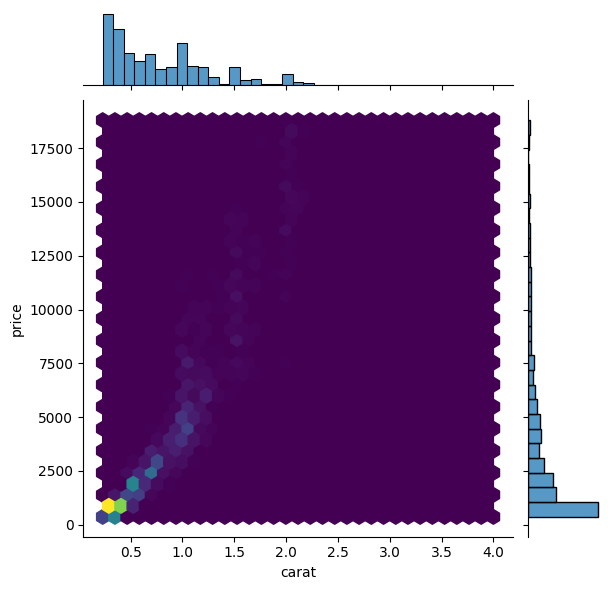

In [17]:
# hex 타입은 데이터가 밀집된 구간을 육각형으로 표시
sns.jointplot(data=df_sample, x='carat', y='price', kind='hex', cmap='viridis')
plt.show()


## 4. 다변량 분석 (3개 이상의 변수 관계)
여러 변수를 동시에 고려하여 데이터의 입체적인 패턴을 찾아냅니다.

### 4.1 Relplot을 이용한 다차원 시각화
`carat`과 `price`의 관계를 `cut`으로 구분하고, `color`를 색상으로 적용합니다.


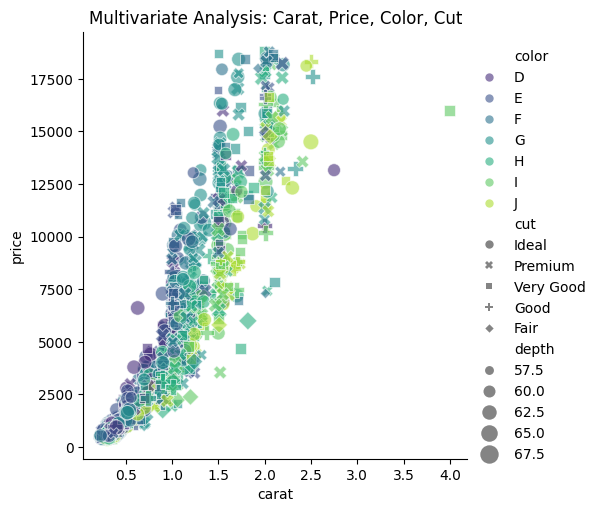

In [18]:
sns.relplot(
    data=df_sample,
    x='carat', y='price',
    hue='color',      # 색상으로 구분
    style='cut',      # 모양으로 구분
    size='depth',     # 점의 크기로 구분
    sizes=(10, 200),
    alpha=0.6,
    palette='viridis'
)
plt.title('Multivariate Analysis: Carat, Price, Color, Cut')
plt.show()

### 4.2 FacetGrid를 이용한 서브플롯 분할
특정 범주형 변수의 조건에 따라 여러 개의 그래프를 격자 형태로 배치합니다.


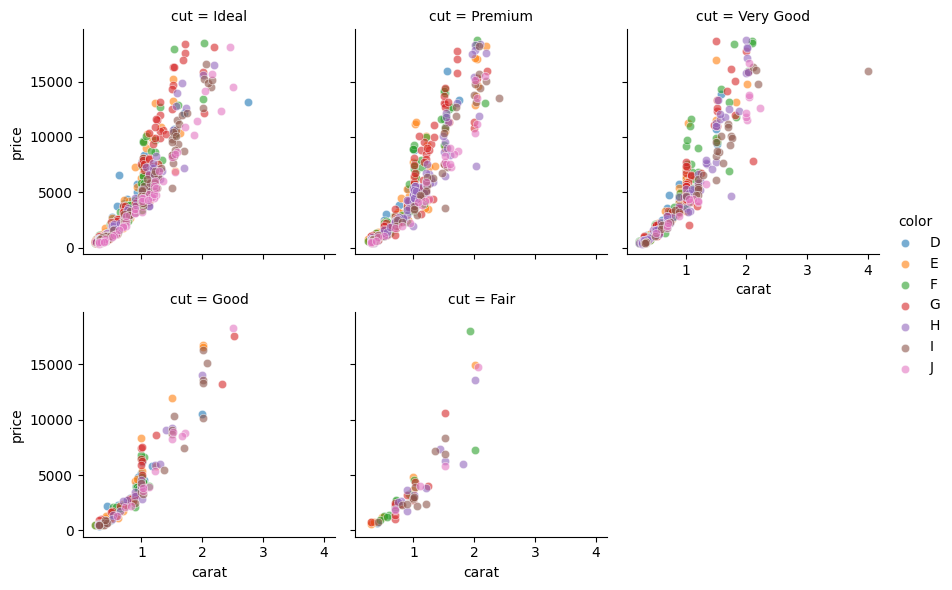

In [19]:
# cut 등급별로 별도의 산점도 생성
g = sns.FacetGrid(df_sample, col='cut', hue='color', col_wrap=3)
g.map(sns.scatterplot, 'carat', 'price', alpha=0.6)
g.add_legend()
plt.show()


### 4.3 상관계수 히트맵 (Correlation Heatmap)
모든 수치형 변수 간의 상관관계를 한눈에 파악합니다.


In [20]:
# 수치형 변수만 선택
numeric_df = diamonds.select_dtypes(include=['float64', 'int64'])
numeric_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


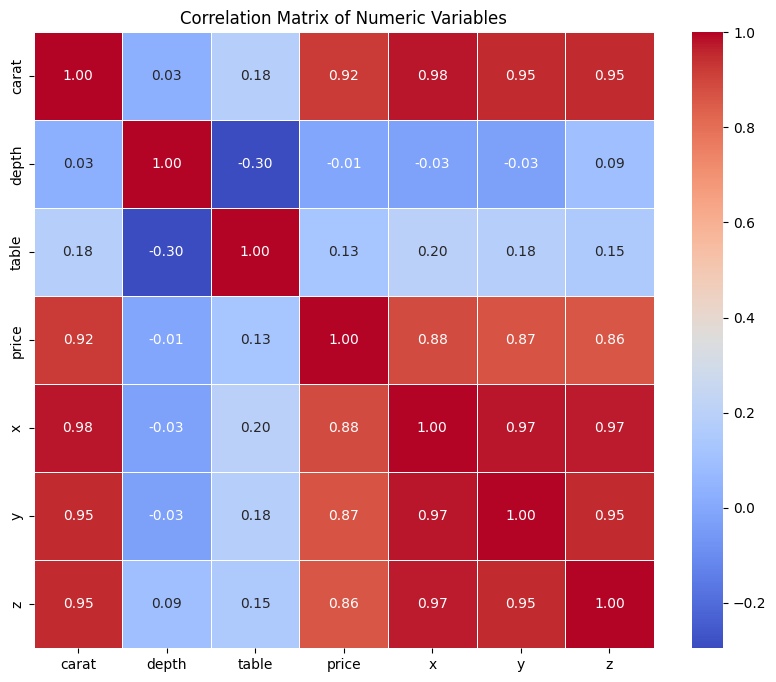

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


## 요약: 실무 EDA 메소드
- `pd.crosstab()`: 범주형 변수 간 빈도 분석을 위한 필수 전처리
- `sns.heatmap()`: 상관계수나 빈도 데이터를 시각화할 때 사용
- `sns.boxplot()` / `sns.violinplot()`: 데이터의 분포와 이상치를 파악하여 정제 방향 결정
- `sns.relplot()`: 3개 이상의 변수를 색상, 크기, 모양으로 통합 분석
- `sns.FacetGrid()`: 특정 조건별로 데이터를 분할하여 비교 분석 수행
- `df.sample()`: 대규모 데이터 시각화 시 성능 최적화 및 오버플로팅 방지용으로 활용